[View in Colaboratory](https://colab.research.google.com/github/ramonsanabria/examples/blob/master/nmtpy_lecture_imagenet.ipynb)

In [52]:
import tensorflow
from random import shuffle
import urllib
from IPython.display import Image

#Download all the list of test images
!mkdir -p images
!wget http://ozancaglayan.com/files/jsalt/test2016/index.txt
!mv ./index.txt images/


--2018-06-20 03:07:13--  http://ozancaglayan.com/files/jsalt/test2016/index.txt
Resolving ozancaglayan.com (ozancaglayan.com)... 185.20.49.7
Connecting to ozancaglayan.com (ozancaglayan.com)|185.20.49.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14756 (14K) [text/plain]
Saving to: ‘index.txt’

index.txt           100%[===================>]  14.41K  --.-KB/s    in 0.1s    

2018-06-20 03:07:14 (142 KB/s) - ‘index.txt’ saved [14756/14756]



In [53]:
#Installing some dependencies
print("Installing some dependencies...")
!pip install resnet
!wget https://raw.githubusercontent.com/fchollet/deep-learning-models/master/imagenet_utils.py

#Download model...
print("Importing all needs...")

import resnet


print("Downloading resnet50 model...")
resnet50 = resnet.ResNet50(weights='imagenet')
print("")
print("Everything prepared! Let's predict some images!")

Installing some dependencies...
--2018-06-20 03:07:19--  https://raw.githubusercontent.com/fchollet/deep-learning-models/master/imagenet_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1566 (1.5K) [text/plain]
Saving to: ‘imagenet_utils.py.1’

imagenet_utils.py.1 100%[===================>]   1.53K  --.-KB/s    in 0s      

2018-06-20 03:07:19 (19.8 MB/s) - ‘imagenet_utils.py.1’ saved [1566/1566]

Importing all needs...

Everything prepared! Let's predict some images!


Reading 4158826243.jpg...
Preprocessing 4158826243.jpg...
Predicting 4158826243.jpg...

Image: 


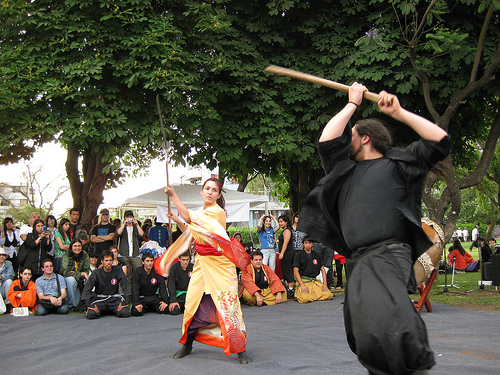


Top 5 classes: 

Top 1: flute (0.95475626)
Top 2: panpipe (0.02022098)
Top 3: plunger (0.003560084)
Top 4: torch (0.0031086982)
Top 5: maypole (0.002876483)


In [57]:
from keras.preprocessing.image import load_img, img_to_array
from imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from IPython.display import Image, display

#Download the each test image
with open("./images/index.txt") as input:
  all_list=input.readlines()

#Lets pick 1 randomly selected image
shuffle(all_list)
image_name=all_list[0].strip()
print("Downloading "+image_name+"...")
url="http://ozancaglayan.com/files/jsalt/test2016/"+image_name
urllib.request.urlretrieve(url, "./images/"+image_name)

complete_path = "./images/"+image_name
    
print("Reading "+image_name+"...")
x = load_img(complete_path, target_size=(224, 224))
x = img_to_array(x)
x = np.expand_dims(x, axis=0)

print("Preprocessing "+image_name+"...")
x = preprocess_input(x)

print("Predicting "+image_name+"...")
preds = resnet50.predict(x)
preds_name=decode_predictions(preds)

print("")
print("Image: ")
display(Image(complete_path, width=400))

print("")
print("Top 5 classes: ")
print("")

for idx, top_element in enumerate(preds_name[0]):
  print("Top "+str(idx+1)+": "+str(top_element[1])+ " ("+str(top_element[2])+")")